In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/walmart_stock_prices.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0


In [12]:
df['Date'] = pd.to_datetime(df['Date'], utc = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          13233 non-null  datetime64[ns, UTC]
 1   Open          13233 non-null  float64            
 2   High          13233 non-null  float64            
 3   Low           13233 non-null  float64            
 4   Close         13233 non-null  float64            
 5   Volume        13233 non-null  int64              
 6   Dividends     13233 non-null  float64            
 7   Stock Splits  13233 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 827.2 KB


In [16]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


<Axes: xlabel='Date', ylabel='Close'>

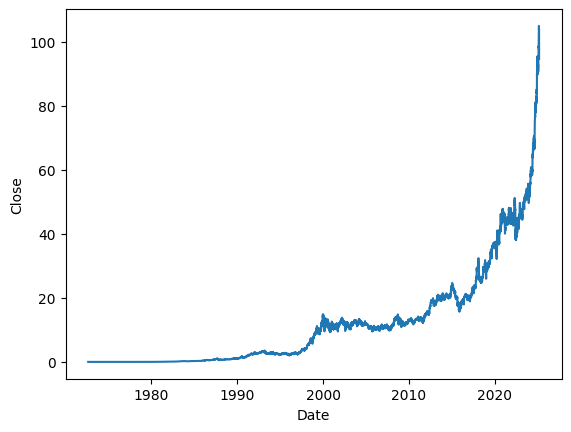

In [18]:
sns.lineplot(x = 'Date', y = 'Close', data = df)

In [33]:
df2 = df.set_index('Date')

In [35]:
df2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1972-08-25 04:00:00+00:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1972-08-28 04:00:00+00:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
1972-08-29 04:00:00+00:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
1972-08-30 04:00:00+00:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
1972-08-31 04:00:00+00:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0


In [37]:
print(df2['Close'].max())
print(df2['Close'].idxmax())

105.0500030517578
2025-02-13 05:00:00+00:00


In [38]:
print(df2['Close'].min())
print(df2['Close'].idxmin())

0.0028387152124196
1974-12-10 05:00:00+00:00


PieceWise Regression. To identify breakpoints in the Timeseries Data, Where trend changes.

In [41]:
from piecewise_regression import Fit

In [42]:
X = df2.index.to_julian_date().values
Y = df2['Close'].values

In [46]:
pw_fit = Fit(X, Y, n_breakpoints = 10)
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                    13233
No. Model Parameters                   22
Degrees of Freedom                  13211
Res. Sum of Squares           1.11988e+05
Total Sum of Squares          3.33066e+06
R Squared                        0.966377
Adjusted R Squared               0.966321
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -12.1859     2.22e+02    -0.054846         0.956       -447.7       423.32
alpha1           4.99288e-06      9.1e-05     0.054896         0.956  -0.00017329   0.00018327
beta1            5.50019e-05     0.000578     0.095155             -    -0.001078     0.001188
beta2            0.000141029     0.000644      0.21911             -   -0.0011206    0.0014027
beta3            

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                    13233\nNo. Model Parameters                   22\nDegrees of Freedom                  13211\nRes. Sum of Squares           1.11988e+05\nTotal Sum of Squares          3.33066e+06\nR Squared                        0.966377\nAdjusted R Squared               0.966321\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst               -12.1859     2.22e+02    -0.054846         0.956       -44

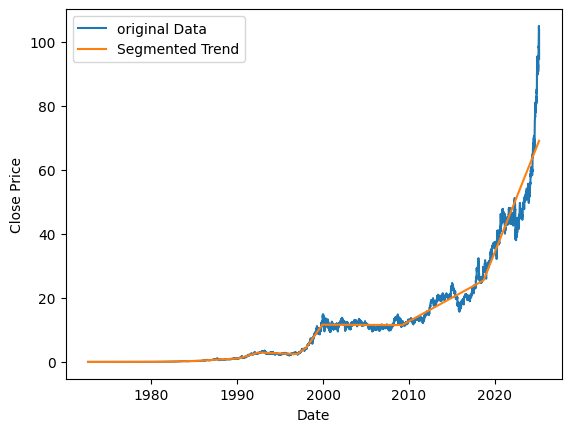

In [47]:
plt.plot(df2.index, Y, label = "original Data")
plt.plot(df2.index, pw_fit.predict(X), label = "Segmented Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

Simple Moving Averages

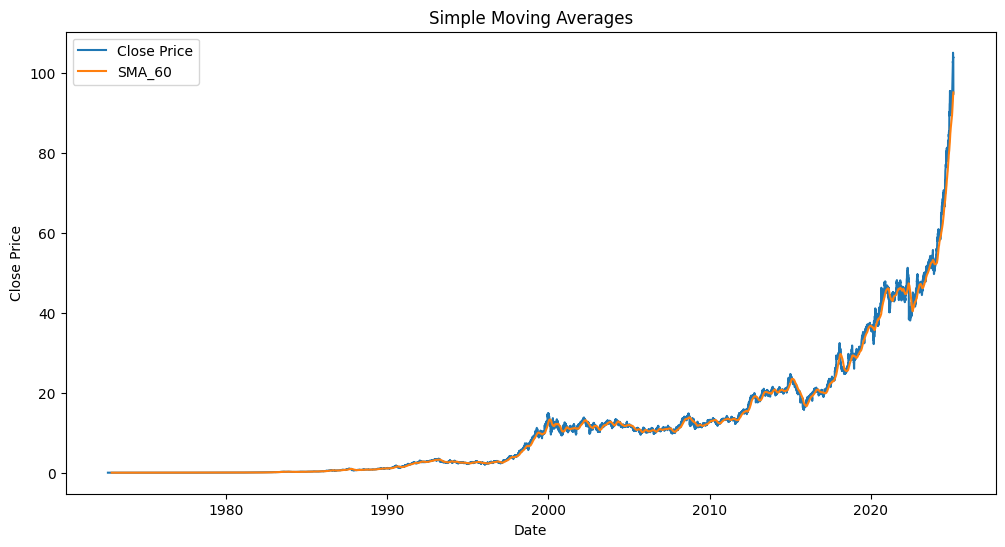

In [50]:
df2['SMA_60'] = df2['Close'].rolling(window = 60).mean()

plt.figure(figsize = (12, 6))
plt.plot(df2['Close'], label = 'Close Price')
plt.plot(df2['SMA_60'], label = 'SMA_60')
plt.title('Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()